# Use Requests Library with Stable Diffusion 3.5 Large in Azure AI and Azure ML for Image to Image requests

Use requests library to consume Stable Diffusion 3.5 Large deployments in Azure AI and Azure ML.

## Prerequisites

Before we start, there are certain steps we need to take to deploy the models:

* Register for a valid Azure account with subscription

* Make sure you have access to Azure AI Studio

* Create a project and resource group

* Select Stable Diffusion 3.5 Large from Model catalog.

* Deploy with "Pay-as-you-go"

Once deployed successfully, you should be assigned for an API endpoint and a security key for inference.

For more information, you should consult Azure's official documentation here for model deployment and inference.

To complete this tutorial, you will need to:

* Install requests:
    
    pip install requests

* Install pillow:
    
    pip install pillow

* Install matplotlib
    
    pip install matplotlib

## Example
The following is an example about how to use requests library with Stable Diffusion 3.5 Large model deployed in Azure AI and Azure ML:



In [29]:
import base64
import requests
from typing import Any
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [30]:
class ImageGeneratorClient:
    def __init__(self, base_url, key):
        """Initialize the client with the endpoint URL and Bearer token."""
        self.route = base_url + "/images/generations"
        self.headers = {
            "Authorization": f"Bearer {key}",
            "Content-Type": "application/json",
            "accept": "application/json",
        }

    def generate_image(
        self,
        input_image_path,
        prompt,
        seed=None,
        negative_prompt=None,
        strength=None,
        response_format=None,
        cfg_scale=None,
    ):
        """Send a request to the endpoint to generate an image and save the result to a file."""
        input_image_base64 = self._read_image_as_base64(input_image_path)
        payload = {"image_prompt": {"image": input_image_base64}, "prompt": prompt}

        self._add_paramter_if_provided(payload, "seed", seed)
        self._add_paramter_if_provided(payload, "negative_prompt", negative_prompt)
        self._add_paramter_if_provided(payload, "strength", strength)
        self._add_paramter_if_provided(payload, "response_format", response_format)

        response = requests.post(self.route, json=payload, headers=self.headers)

        if response.status_code == 200:
            response_data = response.json()
            generated_image_base64 = response_data.get("image")
            if generated_image_base64:
                # Decode and display the generated image
                self._display_base64_image(generated_image_base64)
            else:
                print("No generated image found in the response.")
        else:
            print(f"Error: {response.status_code}, {response.text}")

    @staticmethod
    def _read_image_as_base64(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode("utf-8")

    @staticmethod
    def _display_base64_image(base64_string):
        """Decode a base64 string and display it as an image."""
        image_data = base64.b64decode(base64_string)
        image = Image.open(BytesIO(image_data))
        plt.imshow(image)
        plt.axis("off")
        plt.show()

    @staticmethod
    def _add_paramter_if_provided(payload: dict, parameter: str, value: Any):
        if parameter == "strength" and value is not None:
            payload["image_prompt"][parameter] = value
            return

        if value is not None:
            payload[parameter] = value

You will need to have a Endpoint url and Authentication Key associated with that endpoint. This can be acquired from previous steps. Configure the client as follows:

base_url: Use the endpoint URL from your deployment.
api_key: Use your API key.

In [31]:
client = ImageGeneratorClient(base_url="", key="")

Use the client to create image generation requests:

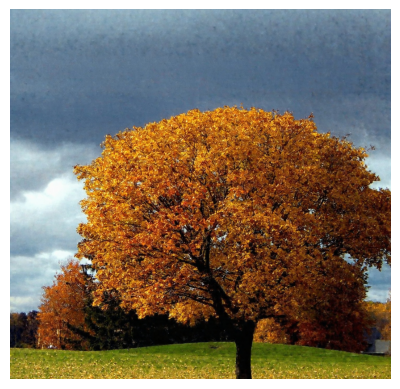

In [32]:
# Mandatory parameters

input_image_path = r""
prompt = "Add a swing to the tree"

# Optional parameters
seed = 42
negative_prompt = "Make the background of the image lighter"
strength = 0.1
response_format = "jpg"

client.generate_image(
    input_image_path=input_image_path, prompt=prompt, strength=strength
)